# Tarea 1_ Red neuronal Perceptrón multicapa con Tensorflow


**Se importan librerias necesarias para el funcionamiento de nuestro MLP**

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

**Se cargan desde los datasets de keras y tensorflow el conjunto de datos fashion_mnist**

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()

## Separando el conjunto de datos en Entrenamiento y prueba 

**Se separa en entrenamiento y test el conjunto de pruebas**

In [ ]:
(x_train, y_train), (x_test, y_test)=fashion_mnist

**Aquí se puede observar que el conjunto de entrenamiento tiene 60,000 imágenes en una dimensión de 28x28**

In [ ]:
x_train.shape

(60000, 28, 28)

**En la celda 72 y 73 se muestra la visualización de un elemento correspondiente al conjunto de entrenamiento**

In [ ]:
imagendemo=x_train[100,:,:]

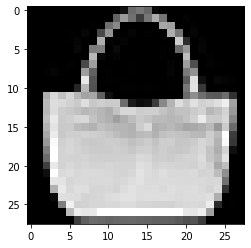

In [ ]:
plt.imshow(imagendemo,cmap='gray')

**Hacemos un reshape para que el tensor tome la dimensión de 60,000 x 784 (este 784 sale porque multiplicamos la dimensión original que es 28x28**

In [ ]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

**Hacemos la codificación one hot de las etiquetas de entrenamiento y validación. Recordando que la códificación one hot nos da un vector binario del tamaño del total de clases donde un 0 es "no corresponde a la clase" y un 1 es "corresponde a la clase"**

In [ ]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)
y_train_onehot.shape

(60000, 10)

In [ ]:
y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)
y_test_onehot.shape

(10000, 10)

In [ ]:
print(y_test_onehot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Las etiquetas numéricas pueden ser transformadas al nombre de la clase correspondiente usando el siguiente diccionario 

In [ ]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [ ]:
label_dict[0]

'T-shirt/top'

## Arquitectura
**Se genera el modelo que corresponde a nuestra arquitectura. Para este modelo se implementan 3 capas donde las variables n_nodes_hlx (x va de 1 a 3) corresponden a las capas. Finalmente se agrega una capa de salida que contiene únicamente las 10 clases que clasificará nuestra red.**

**En las línas 8-9, 11-12, 14-15 y 17-18 multiplico por 0.1 esto corresponde a un método de regularización para que los pesos no inicien en números muy grandes, pues como se ve en los resultados de entrenamiento, ayuda a obtener mejores resultados de entrenamiento.**

In [ ]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1=340,
               n_nodes_hl2=200,
               n_nodes_hl3=100,
               n_classes=10):
    
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1)*0.1,name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1)*0.1,name="hl1bias",dtype="float32")

    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2)*0.1,name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2)*0.1,name="hl2bias",dtype="float32")

    self.h3LW = tf.Variable(np.random.rand(n_nodes_hl2, n_nodes_hl3)*0.1,name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(np.random.rand(n_nodes_hl3)*0.1,name="hl3bias",dtype="float32")

    self.outW = tf.Variable(np.random.rand(n_nodes_hl3, n_classes)*0.1,name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.rand(n_classes)*0.1,name="outbias",dtype="float32")

    self.trainable_variables =[self.h1LW,self.h1LB,
                               self.h2LW,self.h2LB,
                               self.h3LW,self.h3LB,

                               self.outW,self.outB]

  def __call__(self,x): 
      # Declarando la arquitectura

      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2,self.h3LW), self.h3LB)
      l3 = tf.nn.relu(l3)

      output = tf.matmul(l3,self.outW) + self.outB
      return output
  

In [ ]:
DNN = DNN_model()


Seleccionar un optimizador


**Tal como se observa en el estado del arte actual, el optimizador Adam sigue siendo uno de los que mejores resultados dan, es por ello que opté por incorporarlo. Como datoe extra, seleccioné un LR de 0.001 para que no diera brincos grandes, es decir, que diera explotación en lugar de exploración**

In [ ]:
optimizador = tf.keras.optimizers.Adam(learning_rate=0.001)

## Definir las métricas a utilizar

**En la celda 83 se definen las métricas que utilizaré al entrenamiento, es decir, aquellas que arrojará como resultado. Cabe aclarar que todas estas provienen de CategoricalAccuracy porque tenemos varias clases, por lo tanto es la ideal**.

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

## Cálculo de gradiente y ajuste
T R A I N

In [ ]:
@tf.function # cabezal para hacerlo compilado
def train_step(model,tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #calculo de una función de error 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
   
  #cálculo de los gradientes
  gradients = tape.gradient(loss, model.trainable_variables)
  #ordenamiento de los gradientes 
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  #aplicación de la regla de ajuste
  optimizador.apply_gradients(capped_grads_and_vars)

  train_loss(loss) #error por época
  train_accuracy(labels, predictions) #accuracy

T E S T 

In [ ]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  t_loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Función de entrenamiento y prueba

In [ ]:
def fitting(model, train_x, train_y, test_x, test_y, EPOCHS, N_batch, batch_size):
  for epoch in range(EPOCHS):
    i=0
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      start = i
      end = i+batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i+=batch_size

    test_step(model,test_x,test_y)
      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch+1,
                         train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

**Se seleccionó un total de 250 epocas para ver si mejoraba el entrenamiento,
sin embargo, como se observa en el entrenamiento, a partir de la época 120, empieza a oscilar únicamente entre 88% y 87% de exactitud de prueba, mientras que la exactitud sin evaluación alcanza el 95%**

In [ ]:
num_epochs = 250
batch = 228
fitting(DNN, x_train, y_train_onehot, x_test, y_test_onehot, num_epochs, int(60000/batch), batch)

Epoch 1, Perdida: 7963.54736328125, Exactitud: 20.045360565185547, Perdida de prueba: 15.568765640258789, Exactitud de prueba: 48.33000183105469
Epoch 2, Perdida: 7.862791061401367, Exactitud: 61.88212585449219, Perdida de prueba: 5.292470932006836, Exactitud de prueba: 66.50999450683594
Epoch 3, Perdida: 4.027539253234863, Exactitud: 70.782470703125, Perdida de prueba: 2.673490524291992, Exactitud de prueba: 73.69999694824219
Epoch 4, Perdida: 2.4750216007232666, Exactitud: 74.48468780517578, Perdida de prueba: 1.812242031097412, Exactitud de prueba: 77.61000061035156
Epoch 5, Perdida: 1.6572870016098022, Exactitud: 77.3147201538086, Perdida de prueba: 1.8772214651107788, Exactitud de prueba: 76.02999877929688
Epoch 6, Perdida: 1.2970364093780518, Exactitud: 78.86398315429688, Perdida de prueba: 0.9016775488853455, Exactitud de prueba: 81.3499984741211
Epoch 7, Perdida: 0.8804863095283508, Exactitud: 80.30985260009766, Perdida de prueba: 0.8933501243591309, Exactitud de prueba: 78.209

# Conclusiones

**A pesar de haber obtenido una exactitud en pruebas de 88.340%, no podemos asegurar que no exisita overfiting, es decir, un sobreentrenamiento. Donde nuestro modelo en lugar de generalizar, particularizó el conjunto de entrenamiento. Otro dato importante es que el uso del regularizador para iniciar los pesos en valores más pequeños ayudó a mejorar el entrenamiento, pues sin él, existían mesetas donde la exactitud alcanzaba un 84% pero en épocas posteriores bajaba hasta un 60%**